In [1]:
from openai import OpenAI
import pandas as pd

# Initialize the OpenAI client
client = OpenAI()

df = pd.read_csv('adjectives.csv')

# Define a translation function using the OpenAI API
def translate(adj):
    completion = client.chat.completions.create(
        model="gpt-3.5-turbo",
        messages=[
            {"role": "system", "content": "You are an expert in Moroccan Darija dialect and in translating Darija to English."},
            {"role": "user", "content": "Translate the provided Moroccan Darija dialect adjective into English using word-by-word translation."},
            {"role": "assistant", "content": "OK, I understand. I am ready for the adjective translation."},
            {"role": "user", "content": "هشيش"},
            {"role": "assistant", "content": "fragile"},
            {"role": "user", "content": "شاعل"},
            {"role": "assistant", "content": "angry"},
            {"role": "user", "content": "ضاصر"},
            {"role": "assistant", "content": "naughty"},
            {"role": "user", "content":  f'{adj}' }
        ],
        temperature=0.1  # Deterministic responses
    )
    return completion.choices[0].message.content

# Apply the translation function to the 'darija_ar' column
df['adj'] = df['darija_ar'].apply(translate)

# Display or save the resulting DataFrame
print(df)


           n1        n2        n3        n4 darija_ar       eng          adj
0      8chich       NaN       NaN       NaN      هشيش   fragile      Fragile
1       cha3l       NaN       NaN       NaN      شاعل     angry        angry
2        DaSr       NaN       NaN       NaN      ضاصر   naughty     stubborn
3      modmin   moudmin  moudmine       NaN      مدمن  addicted     addicted
4      ghabyy     ghaby       NaN       NaN      غبيّ    stupid       stupid
..        ...       ...       ...       ...       ...       ...          ...
988  mirikani       NaN       NaN       NaN  ميريكاني  american     American
989    chinwi       NaN       NaN       NaN     شينوي   chinese  What is it?
990      3rbi     3arbi     3erbi    3arabi      عربي      arab       Arabic
991    mkhbbi   mkhebbi   mkhabbi       NaN     مخبّي    hidden       hidden
992   mti99en  mtye99en  mtya99an  mtya99en    متيقّن      sure    confident

[993 rows x 7 columns]


[(2, 'Fragile', 'fragile', 1.0, True), (3, 'angry', 'angry', 1.0, True), (4, 'stubborn', 'naughty', 0.3333333333333333, False), (5, 'addicted', 'addicted', 1.0, True), (6, 'stupid', 'stupid', 1.0, True), (7, 'messy', 'stupid', 0.3333333333333333, False), (8, 'confused', 'stupid', 0.3333333333333333, False), (9, 'big', 'big', 1.0, True), (10, 'small', 'small', 1.0, True), (11, 'determined', 'broken', 0.3333333333333333, False), (12, 'boring', 'boring', 1.0, True), (13, 'bald', 'bald', 1.0, True), (14, 'stubborn', 'fat', 0.3333333333333333, False), (15, 'clumsy', 'fat', 0.3333333333333333, False), (16, 'delicate', 'thin', 0.3333333333333333, False), (17, 'tall', 'tall', 1.0, True), (18, 'short', 'short', 1.0, True), (19, 'beautiful', 'beautiful', 1.0, True), (20, 'stubborn', 'handsome', 0.3333333333333333, False), (21, 'disappointed', 'ugly', 0.3333333333333333, False), (22, 'silly', 'crazy', 0.3333333333333333, False), (23, 'stubborn', 'crazy', 0.3333333333333333, False), (24, 'full', '

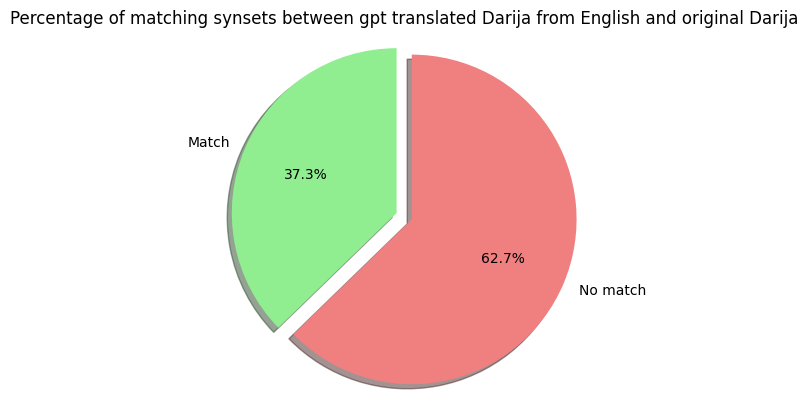

In [4]:
import matplotlib.pyplot as plt
from nltk.corpus import wordnet as wn

eng = df['eng']
transl = df['adj']

transl = [verb.replace(" ", "_") for verb in transl]
eng = [verb.replace(" ", "_") for verb in eng]

def max_path_similarity(word1, word2):
    """Calculate the maximum path similarity between two words."""

    synsets1 = wn.synsets(word1, pos=wn.ADJ)
    synsets2 = wn.synsets(word2, pos=wn.ADJ)
    max_score = 0
    for syn1 in synsets1:
        for syn2 in synsets2:
            score = syn1.path_similarity(syn2)
            if score and score > max_score:
                max_score = score
    return max_score
# Calculate and print the path similarity for each pair of verbs with similar index

def evaluate_pairs(threshold=0.5):
    """Evaluating each pair using WordNet path similarity and a threshold."""
    results = []
    for i in range(len(transl)):
        word1, word2 = transl[i], eng[i]
        similarity = max_path_similarity(word1, word2)
        results.append((i+2, word1, word2, similarity, similarity >= threshold))
    return results
results = evaluate_pairs()
print(results)


# Extract the last element of each tuple in the list (representing True or False values)
last_elements = [result for *_, result in results]

# Count how many comparisons are True
true_count = sum(last_elements)  # True evaluates to 1, so summing directly counts the True values

# Calculate the percentage of True vs False
total_comparisons = len(results)
false_count = total_comparisons - true_count

# Plot pie chart
labels = 'Match', 'No match'
sizes = [true_count, false_count]
colors = ['lightgreen', 'lightcoral']
explode = (0.1, 0)  # explode 1st slice

plt.pie(sizes, explode=explode, labels=labels, colors=colors, autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle.
plt.title("Percentage of matching synsets between gpt translated Darija from English and original Darija")
plt.show()
